In [24]:
from rbac.acl import Registry,get_family
from rbac.context import IdentityContext, PermissionDenied

In [17]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# RBAC
In this lab, we use the `simple-rbac` library to represent how the RBAC model is used.

In `simple-rbac`, it implements the standard RBAC with role hierarchy model:

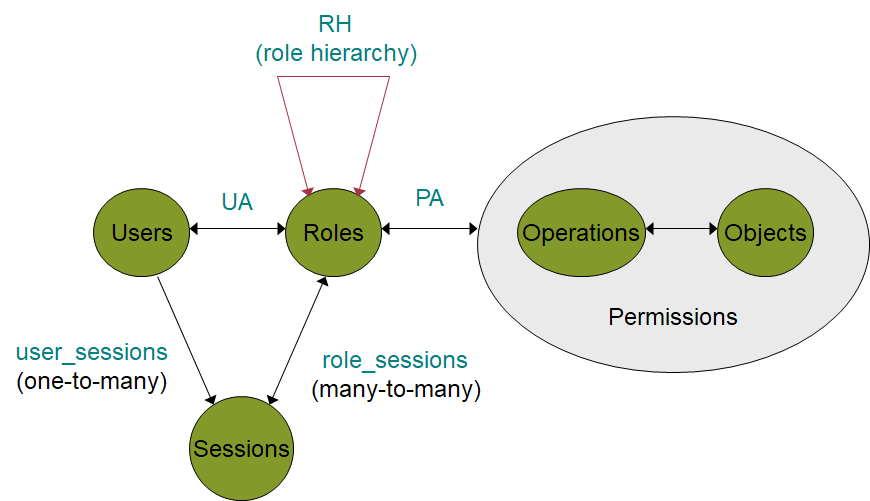

In the model, we have several entities:
 1. *Role*
 2. *User*
 3. *Session*
 4. *Permission*
 
 Here, we design a very simple RBAC policy below with just three roles and one object:

 
 |   |staff|intern|editor|
 |:---|:-----|:------|:------|
 |article|view|view|view/edit|
 


 
 The rules can be defined by the code below:

In [10]:
# -----------------------------------------------
# build the access control list and add the rules
# -----------------------------------------------

acl = Registry()
context = IdentityContext(acl)

acl.add_role("staff")
acl.add_role("editor", parents=["staff"])
acl.add_role("intern", parents=["staff"])
acl.add_resource("article")

acl.allow("staff", "view", "article")
acl.allow("editor", "edit", "article")


After defined the rules, we can test the rule with context

In [11]:

# -------------
# to be a staff
# -------------

@context.set_roles_loader
def first_load_roles():
    yield "staff"


print("* Now you are %s." % ", ".join(context.load_roles()))


@context.check_permission("view", "article", message="can not view")
def article_page():
    return "<view>"


# use it as `decorator`
@context.check_permission("edit", "article", message="can not edit")
def edit_article_page():
    return "<edit>"


if article_page() == "<view>":
    print("You could view the article page.")

try:
    edit_article_page()
except PermissionDenied as exception:
    print("You could not edit the article page, ")
    print("the exception said: '%s'." % exception.kwargs['message'])

try:
    # use it as `with statement`
    with context.check_permission("edit", "article"):
        pass
except PermissionDenied:
    print("Maybe it's because you are not an editor.")



* Now you are staff.
You could view the article page.
You could not edit the article page, 
the exception said: 'can not edit'.
Maybe it's because you are not a editor.


In [12]:

# --------------
# to be an editor
# --------------

@context.set_roles_loader
def second_load_roles():
    yield "editor"


print("* Now you are %s." % ", ".join(context.load_roles()))

if edit_article_page() == <Your Code>:
    print("You could edit the article page.")



* Now you are editor.
You could edit the article page.


In [16]:

# ---------------
# to be an intern
# ---------------

@context.set_roles_loader
def third_load_roles():
    yield "intern"


print("* Now you are %s." % ", ".join(context.load_roles()))

try:
    if article_page() == "<view>":
        print("You could view the article page.")
except PermissionDenied as exception:
    print("You could not view the article page,")
    print("the exception said: '%s'." % exception.kwargs['message'])


if context.check_permission(<Your Code>):
    print("An intern could view the article page.")

# use it as `check function`
try:
    context.check_permission("edit", "article").check()
except PermissionDenied as exception:
    print("An intern could not edit the article page.")

* Now you are intern.
You could view the article page.
An intern could view the article page.
An intern could not edit the article page.


### An advanced example
From the above example, you already practice some ideas of RBAC, we can then go to a more sophisticated example, which is from the module content:

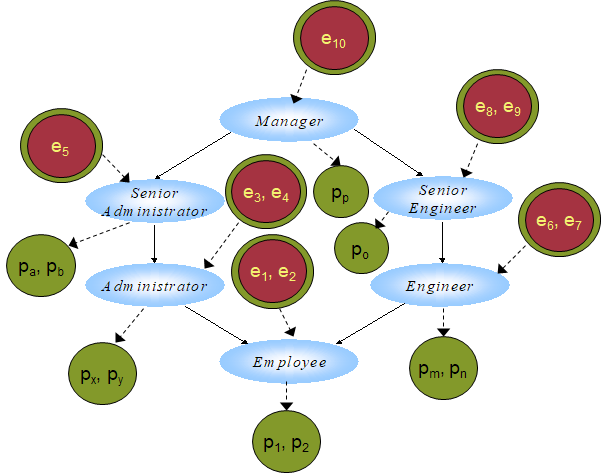

From the above figure, we can define the RBAC policy with the code similar to the above example (we treat all the permission as editting some objects):

In [18]:
acl = Registry()
context = IdentityContext(acl)

acl.add_role("employee")
acl.add_role("engineer", parents=["employee"])
acl.add_role("administrator", parents=["employee"])
acl.add_role("senior_engineer", parents=["engineer"])
acl.add_role("senior_administrator", parents=["administrator"])
acl.add_role("manager", parents=[<Your Code>])
acl.add_resource("1")
acl.add_resource("2")
acl.add_resource("x")
acl.add_resource("y")
acl.add_resource("m")
acl.add_resource(<Your Code>)
acl.add_resource("a")
acl.add_resource("b")
acl.add_resource("o")
acl.add_resource("p")

acl.allow("employee", "edit", "1")
acl.allow("employee", "edit", "2")
acl.allow("administrator", "edit", "x")
acl.allow("administrator", "edit", "y")
acl.allow("engineer", "edit", "m")
acl.allow("engineer", "edit", "n")
acl.allow("senior_administrator", "edit", "a")
acl.allow(<Your Code>)
acl.allow("senior_engineer", "edit", "o")
acl.allow("manager", "edit", "p")

With the rules defineds above, we can test the assigned permissions as follows

In [26]:
# -------------
# to be a senior_engineer
# -------------

@context.set_roles_loader
def first_load_roles():
    yield "senior_engineer"


print("* Now you are %s." % ", ".join(context.load_roles()))


@context.check_permission("edit", "1", message="can not edit 1")
def edit_1():
    return "<edit 1>"


# use it as `decorator`
@context.check_permission("edit", "a", message="can not edit a")
def edit_a():
    return "<edit a>"


if edit_1() == <Your Code>:
    print("You could edit the object 1.")

try:
    edit_a()
except PermissionDenied as exception:
    print("You could not edit the object a, ")
    print("the exception said: '%s'." % exception.kwargs['message'])

try:
    # use it as `with statement`
    with context.check_permission("edit", "a"):
        pass
except PermissionDenied:
    print("Maybe it's because you are not a senior administrator/manager.")
    

* Now you are senior_engineer.
You could edit the object 1.
You could not edit the object a, 
the exception said: 'can not edit a'.
Maybe it's because you are not a senior administrator.


In [29]:
# -------------
# to be a manager
# -------------

@context.set_roles_loader
def first_load_roles():
    yield "manager"

print("* Now you are %s." % ", ".join(context.load_roles()))
    
try:
    # use it as `with statement`
    with context.check_permission(<Your Code>):
        print("You could edit the object a.")
except PermissionDenied:
    print("Maybe it's because you are not a senior administrator/manager.")

* Now you are manager.
You could edit the object a.


### Reference
 1. [Simple RBAC](https://github.com/tonyseek/simple-rbac)